# Import Library

In [1]:
import gymnasium as gym
import numpy as np
import torch

c:\Users\choho\Desktop\Master DS\RL\test\Final\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialisation

In [3]:
# fix seed

seed = 42
def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

np.random.seed(seed)
seed_torch(seed)

# parameters

num_frames = 10000
memory_size = 1000
batch_size = 32
target_update = 100
epsilon_decay = 1 / 2000



## Environment

You use CartPole-v1 from Farama Gymnasium's repository for its computational efficiency.

In [2]:
# environment
env = gym.make("CartPole-v1", max_episode_steps=200, render_mode="rgb_array")

## DQN

from utils.DQN import DQNAgent

agent = DQNAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/dqn"
agent.test(video_folder=video_folder)

# DDQN

from utils.DDQN import DDQNAgent

agent = DDQNAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/dqn"
agent.test(video_folder=video_folder)

# Prioritized DDQN

from utils.PER import PERAgent

agent = PERAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/dqn"
agent.test(video_folder=video_folder)

# Dueling DDQN

from utils.DUELLING import DUELLINGAgent

agent = DUELLINGAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/dqn"
agent.test(video_folder=video_folder)

# Multi-step learning

from utils.MULTISTEP import MULTISTEPAgent

agent = MULTISTEPAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/dqn"
agent.test(video_folder=video_folder)

# Distributional DQN

from utils.DISTRIBUTIONALDQN import DISTRIBUTIONALDQNAgent

agent = DISTRIBUTIONALDQNAgent(env, memory_size, batch_size, target_update, epsilon_decay, seed)

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/dqn"
agent.test(video_folder=video_folder)

# Noisy DQN


from utils.NOISYDQN import NOISYDQNAgent

agent = NOISYDQNAgent(env, memory_size, batch_size, target_update, seed)  #no epsilon_decay here

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/noisy"
agent.test(video_folder=video_folder)

# Rainbow

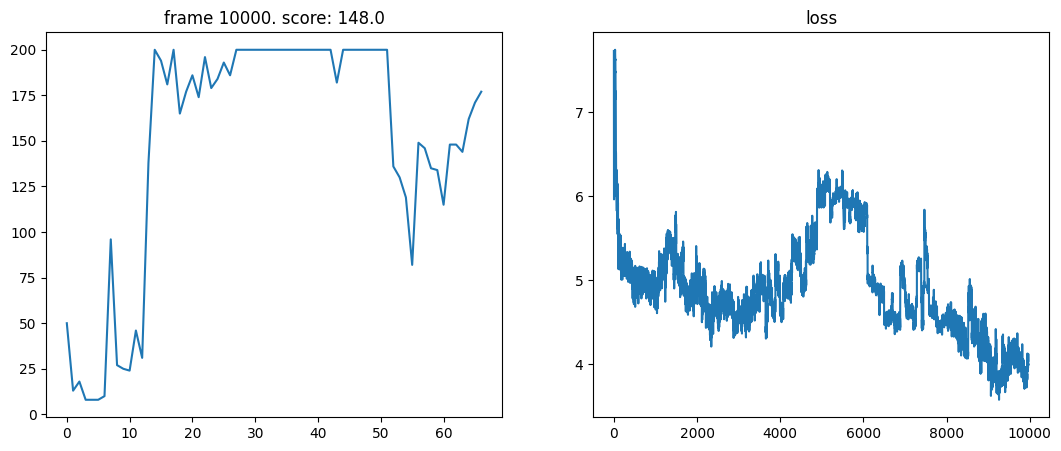

Moviepy - Building video c:\Users\choho\Desktop\Master DS\RL\test\Final\rainbow-is-all-you-need\videos\noisy\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\choho\Desktop\Master DS\RL\test\Final\rainbow-is-all-you-need\videos\noisy\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\choho\Desktop\Master DS\RL\test\Final\rainbow-is-all-you-need\videos\noisy\rl-video-episode-0.mp4
score:  200.0


In [4]:
from utils.RAINBOW import RAINBOWAgent

agent = RAINBOWAgent(env, memory_size, batch_size, target_update, seed)  #no epsilon_decay here

## Train

agent.train(num_frames)

## store one episode in video
#Run the trained agent (1 episode).

video_folder="videos/noisy"
agent.test(video_folder=video_folder)